In [52]:
from sklearn.model_selection import train_test_split
import numpy as np

fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]
fish_target = [1] * 35 + [0] * 14


fish_data = np.column_stack((fish_length,fish_weight))
fish_target = [1] * 35 + [0] * 14

train_input , test_input, train_target, test_target = train_test_split(fish_data,fish_target)

In [53]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=5)
kn.fit(train_input, train_target)
kn.score(test_input,test_target)

1.0

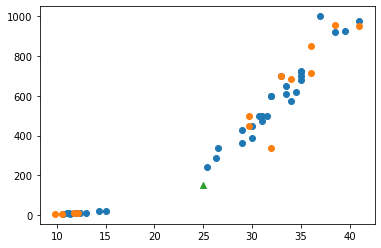

In [54]:
import matplotlib.pyplot as plt

# print(train_input)
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(test_input[:,0], test_input[:,1])
plt.scatter([25],[150], marker="^")
plt.show()

In [55]:
kn.predict([[25,130]])

array([0])

>### 실제 거리를 구해보자

In [56]:
distances, indexes = kn.kneighbors([[25,150]])

print(distances)
print(train_input[indexes]) # 파이썬은 배열의 인덱스에 리스트를 넣으면 모두 자동으로 for-each문 돌듯이 출력함.

[[ 92.00086956 130.48375378 130.73859415 137.17988191 138.32150953]]
[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 12.4  13.4]
  [ 13.   12.2]]]


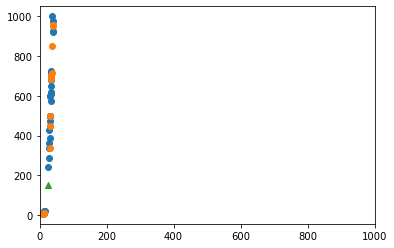

In [57]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(test_input[:,0], test_input[:,1])
plt.scatter([25],[150], marker="^")
plt.xlim((0,1000))
plt.show()

### Scaling 하기
- 분산
- 표준편차
- 표준점수

In [61]:
# print(train_input)
# std_length = np.std(train_input[:,0]) # 표준 편차 구하는 메서드 => 즉 분산 생략가능
# std_weight = np.std(train_input[:,1])

# train
mean = np.mean(train_input, axis=0) # 평균
std = np.std(train_input, axis=0) # 표준편차
train_scaled = (train_input - mean) / std # 표준점수

#test
mean2 = np.mean(test_input, axis=0) # 평균
std2 = np.std(test_input, axis=0) # 표준편차
test_scaled = (test_input - mean2) / std2 # 표준점수
print(test_scaled)

[[-1.37849028 -1.31208765]
 [-1.55698006 -1.32110723]
 [ 0.78123603  1.05583205]
 [ 0.78123603  0.67250021]
 [ 1.22746047  1.3376937 ]
 [ 0.42425647 -0.38166235]
 [-1.49450864 -1.31885233]
 [ 0.21899323  0.06931628]
 [-1.34279232 -1.30560484]
 [ 0.60274625  0.59076033]
 [ 0.21899323 -0.07161454]
 [ 1.00434825  1.35178678]
 [ 0.51350136  0.63303958]]


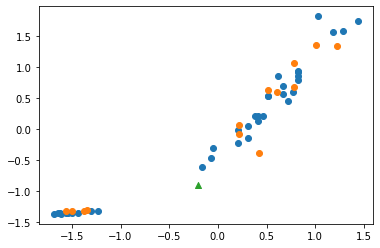

In [59]:
new = ([25,150] - mean) /std

plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(test_scaled[:,0], test_scaled[:,1])
plt.scatter(new[0], new[1], marker="^")
plt.show()

In [60]:
kn.fit(train_scaled, train_target)
print(kn.score(test_scaled, test_target))

print(kn.predict([new]))

1.0
[1]
